In [32]:
#mengimport library yang akan digunakan
import matplotlib.pyplot as plt
import cv2
import numpy as np

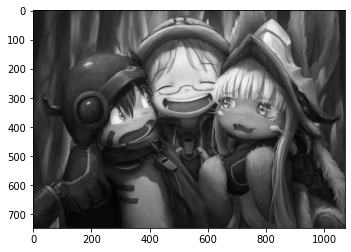

In [33]:
#memanggil dan menginputkan gambar yang akan diproses
img = plt.imread('jurnal.jpg')
#mengubah gambar menjadi grayscale dan disimpan dalam variabel gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#menampilkan gambar
plt.imshow(gray, cmap='gray')

In [34]:
#fungsi konvolusi
def konv(image, kernel): 
    #memasukkan nilai tinggi dan lebar dari array, variabel tgi yang menyimpan tinggi dari array dan lbr yang menyimpan lebar dari array                
    tgi, lbr = image.shape[0],image.shape[1]

    #memasukkan nilai tinggi dan lebar dari kernel, variabel tgi_kernel yang menyimpan tinggi dari kernel dan lbr_kernel yang menyimpan lebar dari kernel
    tgi_kernel, lbr_kernel = kernel.shape

    #mencari titik tengah dari kernel
    centerx, centery = int(tgi_kernel/2) , int(lbr_kernel/2)

    # np.pad (array(tempat menaruh array yang akan dibuatkan padding) , pad_width(mengantur jumlah padding format((atas,bawah),(kanan,kiri),)))
    padding = np.pad(image,((tgi_kernel-1-centerx, centerx),
                            (lbr_kernel-1-centery, centery)),"constant")

    #membuat array kosong yang ukurannya sama dengan ukuran array yang ingin dikonvolusi
    konvolusi = np.zeros([tgi,lbr])

    #melakukan proses konvolusi yaitu perkalian dengan kernelnya kemudian ditambahkan. proses dilakukan dengan menggunakan looping
    for x in range (tgi):
        for y in range (lbr):
            for i in range (tgi_kernel):
                for j in range (lbr_kernel):
                    konvolusi[x,y] += padding[x+i, y+j] * kernel[i,j]

    #mengembalikan nilai variabel kvl
    return konvolusi

In [35]:
#kernel sobel
sx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) #kernel sx operator sobel
sy = np.array([[1,2,1],[0,0,0],[-1,-2,-1]]) #kernel sy operator sobel

#kernel prewitt
px = np.array([[-1,0,1],[-1,0,1],[-1,0,1]]) #kernel px operator prewitt
py = np.array([[1,1,1],[0,0,0],[-1,-1,-1]]) #kernel py operator prewitt

#kernel robert
rx = np.array([[1,0],[0,-1]]) #kernel r+ operator robert
ry = np.array([[0,1],[-1,0]]) #kernel r- operator robert

In [36]:
#membuat fungsi untuk mengubah pixel menjadi hitam putih
def pixWhite(array):
    #melakukan perulangan untuk mengecek tiap lebar dan tinggi
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            #membuat kondisi apabila pixel bernilai lebih dari atau sama dengan 128 akan diubah menjadi 255
            #agar menjadi pixel berwarna putih
            if(array[i][j] >= 128):
                array[i][j] = 255
            #kondisi apabila pixel bernilai kurang dari 128 akan diubah menjadi 0 
            #agar menjadi pixel berwarna hitam
            else: 
                array[i][j] = 0
    #mengembalikan nilai dari pixel yang telah dirubah sebagai hasil dari fungsi
    return array

In [37]:
#membuat fungsi sobel
def sobel(image, sx, sy):
    #melakukan konvolusi dengan parameter image dan kernel x dari sobel
    ix = konv(image,sx)
    #melakukan konvolusi dengan parameter image dan kernel y dari sobel 
    iy = konv(image,sy) 

    #menjumlahkan hasil dari konvolusi kernel x dan y dengan abs agar nilainya mutlak
    hasil = abs(ix) +abs(iy)
    #memproses hasil penjumlahan dengan memanggil fungsi pix_white untuk mengubah pixel menjadi
    #hanya hitam dan putih 
    hasil = pixWhite(hasil)

    #mengembalikan nilai hasil sebagai hasil dari sobel
    return hasil

In [38]:
#membuat fungsi prewitt
def prewitt(image, px, py):
    #melakukan konvolusi dengan parameter image dan kernel x dari prewitt
    ix = konv(image,px) 
    #melakukan konvolusi dengan parameter image dan kernel y dari prewitt
    iy = konv(image,py) 

    #menjumlahkan hasil dari konvolusi kernel x dan y dengan abs agar nilainya mutlak
    hasil = abs(ix) +abs(iy) 
    #memproses hasil penjumlahan dengan memanggil fungsi pix_white untuk mengubah pixel menjadi
    #hanya hitam dan putih
    hasil = pixWhite(hasil)

    #mengembalikan nilai hasil sebagai hasil dari prewitt
    return hasil

In [39]:
#membuat fungi robert
def robert(image, rx, ry):
    #melakukan konvolusi dengan parameter image dan kernel x dari robert
    ix = konv(image,rx) 
    #melakukan konvolusi dengan parameter image dan kernel y dari robert
    iy = konv(image,ry) 

    #menjumlahkan hasil dari konvolusi kernel x dan y dengan abs agar nilainya mutlak
    hasil = abs(ix) +abs(iy) 
    #memproses hasil penjumlahan dengan memanggil fungsi pix_white untuk mengubah pixel menjadi
    #hanya hitam dan putih
    hasil = pixWhite(hasil)

    #mengembalikan nilai hasil sebagai hasil dari robert
    return hasil

In [40]:
Sobel = sobel(gray,sx,sy) #memanggil fungsi sobel untuk memproses deteksi tepi dengan fungsi sobel
Prewitt = prewitt(gray,px,py) #memanggil fungsi prewitt untuk memproses deteksi tepi dengan fungsi prewitt
Robert = robert(gray,rx,ry) #memanggil fungsi robert untuk memproses deteksi tepi dengan fungsi robert

# MEMUNCULKAN HASIL AKHIR DARI DETEKSI TEPI DENGAN SOBEL, PREWITT DAN ROBERT

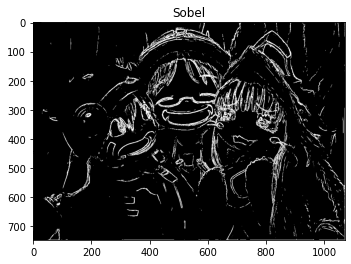

In [41]:
#menampilkan hasil sobel dengan colormap gray
plt.title('Sobel')
plt.imshow(Sobel, cmap="gray")

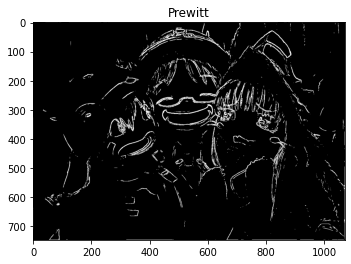

In [42]:
#menampilkan hasil prewitt dengan colormap gray
plt.title('Prewitt')
plt.imshow(Prewitt, cmap="gray")

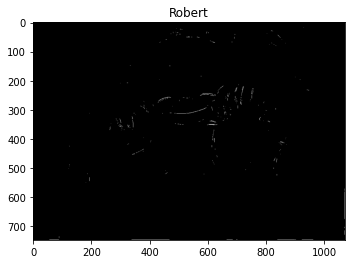

In [43]:
#menampilkan hasil robert dengan colormap gray
plt.title('Robert')
plt.imshow(Robert, cmap="gray")

# PERBEDAAN

Perbedaaan antara ketiga metode ini terletak pada kernel yang digunakan dalam melakukan konvolusi terhadap piksel gambar. sehingga nanti akan menghasilkan hasil konvolusi yang berbeda. Hasil metode Sobel dan Prewitt hampir sama, tetapi ada sedikit perbedaan yang mana piksel yang berwarna putih/terang di metode Prewitt lebih banyak dari pada metode Sobel dan nantinya akan digunakan untuk menentukan Metode deteksi tepi terbaik. Sedangkan pada Metode Robert jelas terlihat perbedaannya yaitu metode ini memiliki visual atau warna yang sedikit lebih hitam/gelap dibandingkan dengan kedua metode sebelumnya yaitu metode Sobel dan metode Prewitt.

# MENENTUKAN METODE DETEKSI TEPI TERBAIK DILIHAT DARI JUMLAH PIKSEL WARNA

In [44]:
#mencari jumlah nilai piksel putih
def countColor(array):
    #mengatur nilai dari variabel count=0
    count = 0
    #melakukan perulangan untuk mengecek masing masing lebar dan tinggi dari gambar
    for i in range(array.shape[0]):
        for j in range(array.shape[1]):
            #membuat kondisi apabila pixelnya berukuran 255 maka nilai dari variabel count akan bertambah satu
            if(array[i][j] == 255):
                count+=1
    #mengembalikan nilai variabel count sebagai hasil dari fungsi 
    return count

In [45]:
#memanggil fungsi count_white untuk menghitung pixel putih pada hasil proses Prewitt
PrewittPix = countColor(Prewitt)
#memanggil fungsi count_white untuk menghitung pixel putih pada hasil proses Sobel 
SobelPix = countColor(Sobel)
#memanggil fungsi count_white untuk menghitung pixel putih pada hasil proses Robert
RobertPix = countColor(Robert)

In [47]:
#membuat kondisi apabila hasil pixel putih prewitt lebih besar dari pixel putih sobel dan robert
#maka akan menampilkan bahwa prewitt adalah metode terbaik
if PrewittPix > SobelPix and PrewittPix > RobertPix:
    hasil = PrewittPix
    print("Metode deteksi tepi terbaik jatuh pada Metode Prewitt dengan jumlah piksel warna putih",hasil)

#membuat kondisi apabila hasil pixel putih prewitt kurang dari pixel putih sobel dan sobel lebih dari robert
#maka akan menampilkan bahwa sobel adalah metode terbaik
elif PrewittPix < SobelPix and SobelPix > RobertPix:
    hasil = SobelPix
    print("Metode deteksi tepi terbaik jatuh pada Metode Prewitt dengan jumlah piksel warna putih",hasil)

#membuat kondisi apabila robert adalah yang nilai pixelnya paling besar
#maka akan menampilkan bahwa prewitt adalah metode terbaik
else:
    hasil = RobertPix
    print("Metode deteksi tepi terbaik jatuh pada Metode Prewitt dengan jumlah piksel warna putih",hasil)

Metode deteksi tepi terbaik jatuh pada Metode Prewitt dengan jumlah piksel warna putih 58831
